In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer #标签二值化
from sklearn.model_selection import train_test_split   #切割数据,交叉验证法

In [2]:
#定义激活函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
#定义激活函数
def dsigmoid(x):
    return x*(1-x)

In [4]:
#网络构建
class NeuralNetwork:
    def __init__(self,layers):#(64,100,10)
        #权重的初始化,范围-1到1：+1的一列是偏置值
        self.V = np.random.random((layers[0] + 1, layers[1]+1))*2 - 1
        self.W = np.random.random((layers[1] + 1, layers[2])) * 2 - 1

    def train(self,X,y,lr=0.11,epochs=10000):
        #添加偏置值：最后一列全是1
        temp = np.ones([X.shape[0],X.shape[1]+1])
        temp[:,0:-1] = X
        X = temp

        for n in range(epochs+1):
            #在训练集中随机选取一行(一个数据)：randint()在范围内随机生成一个int类型
            i = np.random.randint(X.shape[0])
            x = [X[i]]
            #转为二维数据：由一维一行转为二维一行
            x = np.atleast_2d(x)

            # L1：输入层传递给隐藏层的值；输入层64个节点，隐藏层100个节点
            # L2：隐藏层传递到输出层的值；输出层10个节点
            L1 = sigmoid(np.dot(x, self.V))
            L2 = sigmoid(np.dot(L1, self.W))

            # L2_delta：输出层对隐藏层的误差改变量
            # L1_delta：隐藏层对输入层的误差改变量
            L2_delta = (y[i] - L2) * dsigmoid(L2)
            L1_delta = L2_delta.dot(self.W.T) * dsigmoid(L1)

            # 计算改变后的新权重
            self.W += lr * L1.T.dot(L2_delta)
            self.V += lr * x.T.dot(L1_delta)

            #每训练1000次输出一次准确率
            if n%1000 == 0:
                predictions = []
                for j in range(X_test.shape[0]):
                    #获取预测结果：返回与十个标签值逼近的距离，数值最大的选为本次的预测值
                    o = self.predict(X_test[j])
                    #将最大的数值所对应的标签返回
                    predictions.append(np.argmax(o))
                #np.equal()：相同返回true，不同返回false
                accuracy = np.mean(np.equal(predictions,y_test))
                print('迭代次数：',n,'准确率：',accuracy)

    def predict(self,x):
        # 添加偏置值：最后一列全是1
        temp = np.ones([x.shape[0] + 1])
        temp[0:-1] = x
        x = temp
        # 转为二维数据：由一维一行转为二维一行
        x = np.atleast_2d(x)

        # L1：输入层传递给隐藏层的值；输入层64个节点，隐藏层100个节点
        # L2：隐藏层传递到输出层的值；输出层10个节点
        L1 = sigmoid(np.dot(x, self.V))
        L2 = sigmoid(np.dot(L1, self.W))
        return L2

In [5]:
#载入数据:8*8的数据集
digits = load_digits()
X = digits.data
Y = digits.target

In [6]:
#输入数据归一化
X -= X.min()
X /= X.max()
#数据为什么要归一化处理？
#当数据集的数值过大，即便乘以较小的权重后仍然还是一个很大的数时，当代入sigmoid激活函数中，激活函数的输出就趋近于1，
#不利于学习怎么操作使数据归一化？原始数据集中每一个数据先减去最小的那个数，将得到的新数据集再除以最大的那个数既可

In [7]:
#网络生成
NN = NeuralNetwork([64,100,10])

In [8]:
#sklearn切分数据
X_train,X_test,y_train,y_test = train_test_split(X,Y)
#标签二值化：将原始标签(十进制)转为新标签(二进制)
labels_train = LabelBinarizer().fit_transform(y_train)
labels_test = LabelBinarizer().fit_transform(y_test)

In [9]:
#网络训练
print('开始训练')
NN.train(X_train,labels_train,epochs=20000)
print('训练结束')

开始训练
迭代次数： 0 准确率： 0.09555555555555556
迭代次数： 1000 准确率： 0.5288888888888889
迭代次数： 2000 准确率： 0.7888888888888889
迭代次数： 3000 准确率： 0.8711111111111111
迭代次数： 4000 准确率： 0.9044444444444445
迭代次数： 5000 准确率： 0.9066666666666666
迭代次数： 6000 准确率： 0.9244444444444444
迭代次数： 7000 准确率： 0.9377777777777778
迭代次数： 8000 准确率： 0.9311111111111111
迭代次数： 9000 准确率： 0.9466666666666667
迭代次数： 10000 准确率： 0.9422222222222222
迭代次数： 11000 准确率： 0.9466666666666667
迭代次数： 12000 准确率： 0.9555555555555556
迭代次数： 13000 准确率： 0.9488888888888889
迭代次数： 14000 准确率： 0.9466666666666667
迭代次数： 15000 准确率： 0.96
迭代次数： 16000 准确率： 0.9444444444444444
迭代次数： 17000 准确率： 0.9511111111111111
迭代次数： 18000 准确率： 0.9466666666666667
迭代次数： 19000 准确率： 0.9555555555555556
迭代次数： 20000 准确率： 0.9644444444444444
训练结束


(1797, 64)


<Figure size 432x288 with 0 Axes>

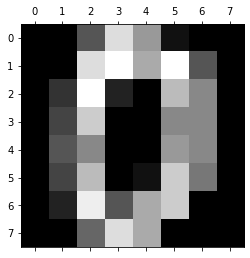

In [10]:
#数据可视化
from sklearn.datasets import load_digits
import pylab as pl

#载入数据集
digits = load_digits()
print(digits.data.shape)

#灰度化图片
pl.gray()
pl.matshow(digits.images[0])
pl.show()